#### -----------------------------------------------------------------------------------------------------------------------------------
### NAMA    : Natalie Fuad
### NIM     : 2109106040

####
### POSTTEST 6 - UNSUPERVISED LEARNING
#### -----------------------------------------------------------------------------------------------------------------------------------

In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [64]:
import warnings

In [65]:
warnings.filterwarnings('ignore')

#### -----------------------------------------------------------------------------------------------------------------------------------
## Buatlah model machine learning menggunakan pendekatan Unsupervised Learning dengan ketentuan sebagai berikut:
#### Gunakan salah satu algoritma unsupervised learning yang ada
#### Tampilkan visualisasi dari hasil model tersebut
#### -----------------------------------------------------------------------------------------------------------------------------------

In [66]:
df = pd.read_csv("Smartphone_Evolution_DataPreprocessing.csv")

In [67]:
df.head()

,Unnamed: 0,Brand,Model,OS,Release_Date,Battery,Processor,Memory,Primary_Storage,External_Storage,...,103,104,105,106,107,108,109,110,111,112
0,0,ARCHOS,40 Cesium,Windows Phone 8.1,"May 01, 2015",1950.0,Qualcomm Snapdragon 200,0.5,4.000000,microSDXC,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,ARCHOS,40 Titanium,Android 4.2.2,"May 01, 2015",1500.0,MediaTek,0.5,34.296597,microSDHC,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,ARCHOS,40b Titanium,Android 4.2.2,"May 01, 2015",1400.0,MediaTek,0.5,4.000000,microSD,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,ARCHOS,45 Titanium,Android 4.2.2,"May 01, 2015",1680.0,MediaTek,0.5,34.296597,microSDHC,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,ARCHOS,45b Helium 4G,Android 4.4.4,"May 01, 2015",1850.0,Qualcomm Snapdragon 410,0.5,4.000000,microSDXC,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## DATA SCALING & PEMBUATAN SUBSET

In [68]:
from sklearn.preprocessing import StandardScaler

In [69]:
subset = df[['Memory', 'Primary_Storage']]

In [70]:
ss = StandardScaler()

In [71]:
x_scaling = ss.fit_transform(subset)

# HIERARCHICAL

# Agglomerative clustering menggunakan scipy

In [72]:
from scipy.cluster.hierarchy import dendrogram, linkage

## Membuat struktur hirarkinya

In [73]:
merge = linkage(x_scaling, method = "complete")

print("\n----------    ++    -------------    ++    ----------")
print("\n       Dataset sebelum dilakukan data cleaning\n")
print("----------    ++    -------------    ++    ----------\n")
print(merge, "\n\n----------    ++    -------------    ++    ----------\n")


----------    ++    -------------    ++    ----------

       Dataset sebelum dilakukan data cleaning

----------    ++    -------------    ++    ----------

[[0.00000000e+00 2.00000000e+00 0.00000000e+00 2.00000000e+00]
 [1.00000000e+00 3.00000000e+00 0.00000000e+00 2.00000000e+00]
 [4.00000000e+00 4.53800000e+03 0.00000000e+00 3.00000000e+00]
 ...
 [9.06800000e+03 9.07000000e+03 7.60773829e+00 5.00000000e+01]
 [9.07100000e+03 9.07200000e+03 1.25625352e+01 4.53700000e+03]
 [8.28000000e+02 9.07300000e+03 1.47306785e+01 4.53800000e+03]] 

----------    ++    -------------    ++    ----------



### Menggambil label dari cluster hierarki

In [74]:
from scipy.cluster.hierarchy import fcluster

In [80]:
flabels = fcluster(merge, 5, criterion = 'distance')

In [81]:
dfhierarki = pd.DataFrame({'labels': flabels, 'External_Storage': df.External_Storage})

In [82]:
ct2 = pd.crosstab(dfhierarki["labels"], dfhierarki["External_Storage"])

# Visualisasi cluster menggunakan fcluster

In [83]:
subset["labels"] = flabels
subset

,Memory,Primary_Storage,labels
0,0.5,4.000000,2
1,0.5,34.296597,2
2,0.5,4.000000,2
3,0.5,34.296597,2
4,0.5,4.000000,2
...,...,...,...
4533,4.0,128.000000,2
4534,4.0,64.000000,2
4535,2.0,32.000000,2
4536,4.0,64.000000,2


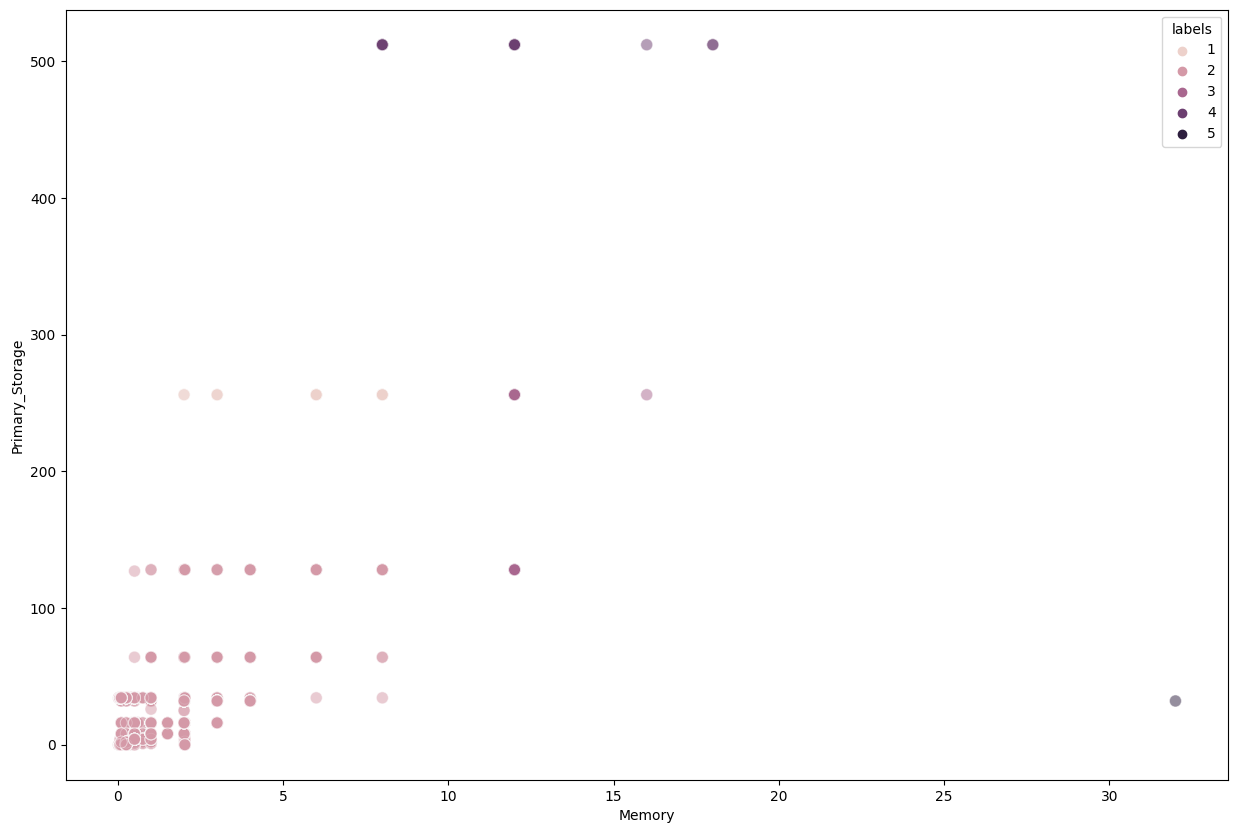

In [85]:
plt.figure(figsize=(15,10))
sns.scatterplot(x = "Memory",
                y = "Primary_Storage",
                data = subset,
                hue = "labels",
                s = 75,
                alpha = 0.5)

plt.show()